In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import zscore, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import log_loss, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/University/Machine Learning/Assignment1/DryBeanDataSet.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

## Data Quality

### General

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,Sort order
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53765.692602,0.902873,4.762541e+02,0.987143,0.873282,0.006564,0.001716,0.643590,2.368097,0.995063,0.500271
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29778.009358,0.296142,2.583687e+04,0.004660,0.059520,0.001128,0.000596,0.098996,0.871619,0.004366,0.287926
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,-30.000000,0.000000,1.614174e-01,0.919246,0.489618,0.002778,0.000564,0.410339,0.695579,0.947687,0.000089
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,1.000000,2.150680e+02,0.985670,0.832096,0.005900,0.001154,0.581359,1.614151,0.993703,0.248187
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,1.000000,2.384380e+02,0.988283,0.883157,0.006645,0.001694,0.642044,2.368757,0.996386,0.503810
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,1.000000,2.794522e+02,0.990013,0.916869,0.007271,0.002170,0.696006,3.115695,0.997883,0.750096
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,1.000000,3.014441e+06,0.994677,0.990685,0.010451,0.003665,0.974767,3.966119,0.999733,0.999985


In [ ]:
df.head().T

,0,1,2,3,4
Area,84648,39704,35835,223035,41957
Perimeter,1132.054,736.873,687.914,1817.278,767.143
MajorAxisLength,439.91571,271.659919,237.70418,680.812555,287.962974
MinorAxisLength,248.961941,186.481404,192.176759,419.994347,186.166695
AspectRation,1.767,1.456767,1.236904,1.621004,1.546802
Eccentricity,0.824453,0.727175,0.588537,0.78704,0.762918
ConvexArea,86779,40106,36190,225889,42310
Constantness,1,1,1,1,1
EquivDiameter,328.294351,224.839282,213.603696,532.894907,231.130508
Colour,brown,black,green,brown,brown


In [ ]:
df.dtypes

,0
Area,int64
Perimeter,float64
MajorAxisLength,float64
MinorAxisLength,float64
AspectRation,float64
Eccentricity,float64
ConvexArea,int64
Constantness,int64
EquivDiameter,float64
Colour,object


In [ ]:
print(f"Shape is {df.shape}")
print(f'Number of classes is {y.nunique()}')
print(f"Class Splits is \n{y.value_counts()}")

Shape is (13611, 22)
Number of classes is 8
Class Splits is 
Class
DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
?             17
Name: count, dtype: int64


### Missing Values and Duplicates

In [ ]:
def missing_values_table(df):
    results = []

    # Iterature over columns checking for missing
    for column in df.columns:
        # Types of missing values to check for
        nans = df[column].isna().sum()
        empty_str = df[column].eq('').sum()
        question = df[column].eq('?').sum()

        # Append result
        results.append({
            'Column': column,
            'Nans': nans,
            'Empty String': empty_str,
            'Question': question,
            'Missing Values': nans + empty_str + question
        })

    missing_values_df = pd.DataFrame(results)

    return missing_values_df.sort_values(by='Missing Values', ascending=False).reset_index(drop=True)

result_df = missing_values_table(X)
print(result_df)

             Column  Nans  Empty String  Question  Missing Values
0       Compactness     0             0        18              18
1            Extent     0             0         6               6
2            Colour     0             0         6               6
3      ShapeFactor6     0             0         5               5
4          Solidity     0             0         0               0
5      ShapeFactor5     0             0         0               0
6      ShapeFactor4     0             0         0               0
7      ShapeFactor3     0             0         0               0
8      ShapeFactor2     0             0         0               0
9      ShapeFactor1     0             0         0               0
10        roundness     0             0         0               0
11             Area     0             0         0               0
12        Perimeter     0             0         0               0
13    EquivDiameter     0             0         0               0
14     Con

In [ ]:
# Get latex for report
missing_latex = result_df.iloc[:4].to_latex(index=False)
print(missing_latex)

\begin{tabular}{lrrrr}
\toprule
Column & Nans & Empty String & Question & Missing Values \\
\midrule
Compactness & 0 & 0 & 18 & 18 \\
Extent & 0 & 0 & 6 & 6 \\
Colour & 0 & 0 & 6 & 6 \\
ShapeFactor6 & 0 & 0 & 5 & 5 \\
\bottomrule
\end{tabular}



In [ ]:
# Checking if rows have multiple missing values
rows_with_missing_values = df[df.isin(['?']).any(axis=1)]

print(rows_with_missing_values[["Compactness", "Extent", "Colour", "Class"]])

      Compactness    Extent Colour     Class
6        0.693508   0.81292  brown         ?
104             ?  0.678398  brown      SIRA
118      0.801302  0.756957  brown         ?
436      0.786581  0.689218  brown         ?
484             ?  0.680053  brown      CALI
788             ?  0.763723  white     HOROZ
902             ?  0.753663  black  DERMASON
935      0.828304  0.784209  brown         ?
1164     0.817321  0.762552  brown         ?
1175     0.909771  0.786411      ?     SEKER
1244            ?  0.780421  green     SEKER
1354     0.795229  0.747245  brown         ?
1772     0.886188  0.777628  brown         ?
2042            ?  0.779229  white     HOROZ
2316     0.728214  0.708616      ?      CALI
2317     0.936952  0.791164      ?     SEKER
2625     0.810484  0.757146  brown         ?
2629     0.808073  0.812296  brown         ?
2636      0.80597  0.783921  brown         ?
2647     0.810367  0.728763  brown         ?
2803            ?  0.765151  black  DERMASON
2831     0

In [ ]:
def plot_histograms_kde_with_missing(X_numer):
    # Replace '?' with NaN and identify rows with missing values
    X_numer_replaced = X_numer.replace('?', np.nan).astype(float)
    missing_value_indices = X_numer_replaced.isna().any(axis=1)

    num_features = X_numer.shape[1]
    num_plots = 4
    num_pages = num_features // num_plots + int(num_features % num_plots > 0)

    plt.figure(figsize=(20, 5 * num_pages))

    for i, feature in enumerate(X_numer.columns):
        plt.subplot(num_pages, num_plots, i + 1)

        # Step 2: Plot the KDE ignoring any NaN values for the current feature
        data = X_numer_replaced[feature].dropna().values
        sns.kdeplot(data, bw_adjust=0.5)
        plt.xlabel("")
        plt.ylabel("")
        plt.title(feature, fontsize = 20)

        # Step 3: Plot red ticks for rows with missing values in other features
        red_tick_indices = missing_value_indices & X_numer_replaced[feature].notna()
        plt.plot(X_numer_replaced.loc[red_tick_indices, feature].values,
                 np.zeros(red_tick_indices.sum()), 'o', color='red', markersize=10)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/University/Machine Learning/Assignment1/missing_kde.png')
    plt.close()

X_numer = X.drop(columns=['Colour', 'Constantness'])
plot_histograms_kde_with_missing(X_numer)


In [ ]:
#Checking for duplicates
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Distribution

In [ ]:
# Create dataframe of numeric values
def create_numeric_df(df):
    df = df.replace('?', np.nan)
    X_numer = df.select_dtypes(include=[np.number]).drop(columns=['Constantness'], errors='ignore')

    return X_numer

def calculate_outliers(X_numer):
    results = []

    for column in X_numer.columns:
        # Calculate Z-score
        z_scores = zscore(X_numer[column].dropna())
        z_outliers = (np.abs(z_scores) > 3).sum()
        size = X_numer[column].size

        # Calculate IQR outliers
        Q1 = X_numer[column].quantile(0.25)
        Q3 = X_numer[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = ((X_numer[column] < (Q1 - 1.5 * IQR)) | (X_numer[column] > (Q3 + 1.5 * IQR))).sum()

        # Append the result as a dictionary
        results.append({
            'Feature': column,
            'Z-Score Outliers': z_outliers,
            'Z_perc': f'{np.round((z_outliers / size) * 100, 2)} %',
            'IQR Outliers': iqr_outliers,
            'IQR_perc': f'{np.round((iqr_outliers / size) * 100, 2)} %'
        })

    outliers_df = pd.DataFrame(results)
    return outliers_df

X_numer = create_numeric_df(df)
outliers_df = calculate_outliers(X_numer)
print(outliers_df)

            Feature  Z-Score Outliers  Z_perc  IQR Outliers IQR_perc
0              Area               483  3.55 %           551   4.05 %
1         Perimeter               404  2.97 %           500   3.67 %
2   MajorAxisLength               316  2.32 %           379   2.78 %
3   MinorAxisLength               508  3.73 %           569   4.18 %
4      AspectRation                15  0.11 %           473   3.48 %
5      Eccentricity               125  0.92 %           843   6.19 %
6        ConvexArea               483  3.55 %           550   4.04 %
7     EquivDiameter                 1  0.01 %           529   3.89 %
8            Extent               135  0.99 %           275   2.02 %
9          Solidity               238  1.75 %           778   5.72 %
10        roundness                74  0.54 %            91   0.67 %
11      Compactness                 1  0.01 %           111   0.82 %
12     ShapeFactor1                59  0.43 %           533   3.92 %
13     ShapeFactor2               

In [ ]:
print(outliers_df.to_latex(index=False))

\begin{tabular}{lrlrl}
\toprule
Feature & Z-Score Outliers & Z_perc & IQR Outliers & IQR_perc \\
\midrule
Area & 483 & 3.55 % & 551 & 4.05 % \\
Perimeter & 404 & 2.97 % & 500 & 3.67 % \\
MajorAxisLength & 316 & 2.32 % & 379 & 2.78 % \\
MinorAxisLength & 508 & 3.73 % & 569 & 4.18 % \\
AspectRation & 15 & 0.11 % & 473 & 3.48 % \\
Eccentricity & 125 & 0.92 % & 843 & 6.19 % \\
ConvexArea & 483 & 3.55 % & 550 & 4.04 % \\
EquivDiameter & 1 & 0.01 % & 529 & 3.89 % \\
Extent & 135 & 0.99 % & 275 & 2.02 % \\
Solidity & 238 & 1.75 % & 778 & 5.72 % \\
roundness & 74 & 0.54 % & 91 & 0.67 % \\
Compactness & 1 & 0.01 % & 111 & 0.82 % \\
ShapeFactor1 & 59 & 0.43 % & 533 & 3.92 % \\
ShapeFactor2 & 5 & 0.04 % & 0 & 0.0 % \\
ShapeFactor3 & 8 & 0.06 % & 195 & 1.43 % \\
ShapeFactor4 & 0 & 0.0 % & 0 & 0.0 % \\
ShapeFactor5 & 242 & 1.78 % & 767 & 5.64 % \\
ShapeFactor6 & 0 & 0.0 % & 0 & 0.0 % \\
Sort order & 0 & 0.0 % & 0 & 0.0 % \\
\bottomrule
\end{tabular}



In [ ]:

def plot_histograms_kde(X_numer, save_path='/content/drive/MyDrive/University/Machine Learning/Assignment1/outlier_kde.png'):
    num_features = X_numer.shape[1]
    num_plots = 4
    num_pages = num_features // num_plots + int(num_features % num_plots > 0)

    plt.figure(figsize=(20, 5 * num_pages))

    for i, feature in enumerate(X_numer.columns):
        plt.subplot(num_pages, num_plots, i + 1)

        data = X_numer[feature].dropna().values

        # Plot the histogram with KDE
        ax = sns.histplot(data, kde=True, bins=50, color='gray')

        # Extract the KDE line from the plot
        kde_line = ax.lines[0]

        # Extract the x and y data from the KDE line
        kde_x = kde_line.get_xdata()
        kde_y = kde_line.get_ydata()

        # Find peaks in the KDE
        peaks, _ = find_peaks(kde_y, height = 30, prominence =5)

        # Extract the x and y data from the KDE line
        kde_x = kde_line.get_xdata()

        # Plot the peaks on the existing plot
        plt.plot(kde_x[peaks], kde_y[peaks], "ro", markersize=10)  # Red dots on peaks

        plt.title(feature, fontsize=20)
        plt.ylabel = ''

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

X = X.replace('?', np.nan)
X_numer = X.drop(columns=['Colour', 'Constantness'])
plot_histograms_kde(X_numer)


In [ ]:
def identify_lof_outliers(X_numer, n_neighbors=20, threshold=-1.5):
    outlier_df = pd.DataFrame(index=X_numer.index)

    for feature in X_numer.columns:
        # Reshape the data to fit the LOF model
        data = X_numer[feature].dropna().values.reshape(-1, 1)

        # Apply LOF model
        lof = LocalOutlierFactor(n_neighbors=n_neighbors)
        lof.fit(data)
        lof_scores = lof.negative_outlier_factor_

        # Identify outliers
        outliers = lof_scores < threshold
        outlier_df[feature] = outliers

    # Add column which is number of times outlier
    outlier_df['outlier_sum'] = outlier_df.sum(axis=1)
    outlier_rows = outlier_df.loc[outlier_df["outlier_sum"] > 1]['outlier_sum']

    return outlier_df, outlier_rows

X_numer = X_numer.dropna()
outlier_df, outlier_rows = identify_lof_outliers(X_numer)
print(outlier_rows.value_counts())

outlier_sum
2    21
4    10
3     6
5     6
6     2
7     1
Name: count, dtype: int64


In [ ]:
def plot_lof_with_outliers(X_numer, outlier_df, save_path='/content/drive/MyDrive/University/Machine Learning/Assignment1/lof_outliers.png'):
    num_features = X_numer.shape[1]
    num_plots = 4
    num_pages = num_features // num_plots + int(num_features % num_plots > 0)

    plt.figure(figsize=(20, 5 * num_pages))

    for i, feature in enumerate(X_numer.columns):
        plt.subplot(num_pages, num_plots, i + 1)

        data = X_numer[feature].dropna().values

        # Identify the non-outliers, feature-specific outliers, and multi-feature outliers
        non_outliers = ~outlier_df[feature]
        feature_outliers = outlier_df[feature] & (outlier_df['outlier_sum'] == 1)
        multi_feature_outliers = outlier_df[feature] & (outlier_df['outlier_sum'] > 1)

        # Plot non-outliers in black
        sns.stripplot(x=np.zeros(len(data[non_outliers])), y=data[non_outliers],
                      color='black', size=1, jitter=True)

        # Plot feature-specific outliers in red
        sns.stripplot(x=np.zeros(len(data[feature_outliers])), y=data[feature_outliers],
                      color='red', size=4, jitter=True)

        # Plot multi-feature outliers in blue
        sns.stripplot(x=np.zeros(len(data[multi_feature_outliers])), y=data[multi_feature_outliers],
                      color='blue', size=4, jitter=True)

        plt.title(feature, fontsize=20)
        plt.xlabel = ''
        plt.ylabel = ''

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

plot_lof_with_outliers(X_numer, outlier_df)

In [ ]:
max_equiv = pd.Series(X['EquivDiameter'].sort_values(ascending = False)[:6])
max_equiv.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n & EquivDiameter \\\\\n\\midrule\n4780 & 3014441.238914 \\\\\n2762 & 24100.351837 \\\\\n2070 & 569.374358 \\\\\n4585 & 565.803115 \\\\\n1833 & 562.408446 \\\\\n1607 & 554.311026 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Categorical Distribution

In [ ]:
import pandas as pd

def investigate_categorical_distribution(X):
    X_cat = X[["Constantness", "Colour"]]

    # Print value counts for each categorical feature
    for feature in X_cat.columns:
        print(f"Value counts for {feature}:")
        print(X_cat[feature].value_counts())
        print("\n" + "-"*40 + "\n")

investigate_categorical_distribution(X)

Value counts for Constantness:
Constantness
1    12289
0     1322
Name: count, dtype: int64

----------------------------------------

Value counts for Colour:
Colour
brown    6115
black    3541
green    2023
white    1926
Name: count, dtype: int64

----------------------------------------



In [ ]:
def investigate_categorical_distribution_by_class(df):
    # Create a pivot tables
    const_table = df.pivot_table(index='Constantness', columns='Class', aggfunc='size')
    colour_table = df.pivot_table(index='Colour', columns='Class', aggfunc='size')

    return const_table, colour_table

df.replace("?", np.nan)
df.dropna(inplace=True)
const_table, colour_table = investigate_categorical_distribution_by_class(df)

print(const_table)
print("\n")
print(colour_table)

Class          ?  BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
Constantness                                                          
0              1       132      63   151       378    168    182   247
1             16      1185     458  1477      3164   1759   1843  2387


Class      ?  BARBUNYA  BOMBAY    CALI  DERMASON   HOROZ   SEKER    SIRA
Colour                                                                  
?        NaN       NaN     1.0     1.0       1.0     1.0     2.0     NaN
black    NaN       NaN     NaN     NaN    3541.0     NaN     NaN     NaN
brown   17.0    1317.0   520.0  1627.0       NaN     NaN     NaN  2634.0
green    NaN       NaN     NaN     NaN       NaN     NaN  2023.0     NaN
white    NaN       NaN     NaN     NaN       NaN  1926.0     NaN     NaN


In [ ]:
print(const_table.to_latex(index = True))

\begin{tabular}{lrrrrrrrr}
\toprule
Class & ? & BARBUNYA & BOMBAY & CALI & DERMASON & HOROZ & SEKER & SIRA \\
Constantness &  &  &  &  &  &  &  &  \\
\midrule
0 & 1 & 132 & 63 & 151 & 378 & 168 & 182 & 247 \\
1 & 16 & 1185 & 458 & 1477 & 3164 & 1759 & 1843 & 2387 \\
\bottomrule
\end{tabular}



In [ ]:
print(colour_table.to_latex(index = True))

\begin{tabular}{lrrrrrrrr}
\toprule
Class & ? & BARBUNYA & BOMBAY & CALI & DERMASON & HOROZ & SEKER & SIRA \\
Colour &  &  &  &  &  &  &  &  \\
\midrule
? & NaN & NaN & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 2.000000 & NaN \\
black & NaN & NaN & NaN & NaN & 3541.000000 & NaN & NaN & NaN \\
brown & 17.000000 & 1317.000000 & 520.000000 & 1627.000000 & NaN & NaN & NaN & 2634.000000 \\
green & NaN & NaN & NaN & NaN & NaN & NaN & 2023.000000 & NaN \\
white & NaN & NaN & NaN & NaN & NaN & 1926.000000 & NaN & NaN \\
\bottomrule
\end{tabular}



### Collinearity

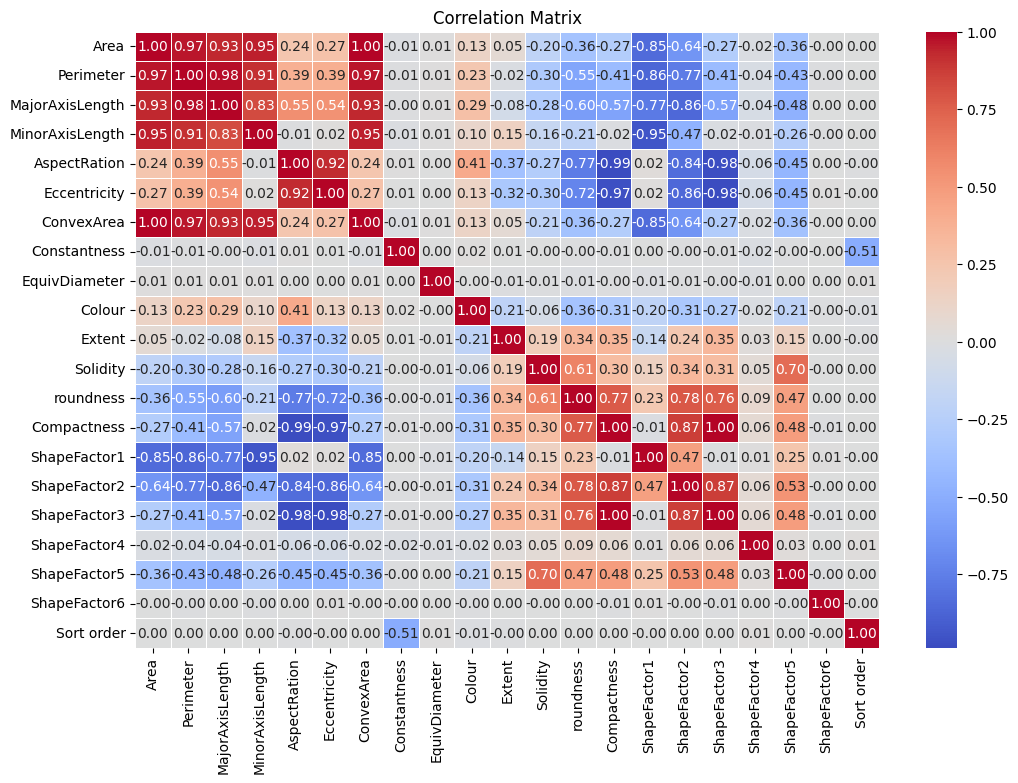

In [ ]:
def create_correlation_matrix(X):
    # Encode Colour
    le = LabelEncoder()
    X["Colour"] = le.fit_transform(X["Colour"])

    X.replace('?', pd.NA, inplace=True)
    X.dropna(inplace=True)

    # Calculate the correlation matrix
    corr_matrix = X.corr()

    # Display as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

    return corr_matrix

correlation_matrix = create_correlation_matrix(X)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def clean_and_calculate_vif(X):
    # Label encode the 'Colour'
    le = LabelEncoder()
    X['Colour'] = le.fit_transform(X['Colour'])

    # Preprcoessing for plot
    X.replace('?', pd.NA, inplace=True)
    X.dropna(inplace=True)
    X = X.apply(pd.to_numeric, errors='coerce')
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

    # Add a constant for VIF
    X_with_constant = add_constant(X)

    # Initiialise DF
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_with_constant.columns
    vif_data['VIF'] = [int(variance_inflation_factor(X_with_constant.values, i)) for i in range(X_with_constant.shape[1])]

    # Calculate VIF for each feature
    vif_data['Tolerance'] = [np.round(1 / variance_inflation_factor(X_with_constant.values, i), 6)
                       for i in range(X_with_constant.shape[1])]

    return vif_data

vif_table = clean_and_calculate_vif(X)
print(vif_table)

            Feature       VIF  Tolerance
0             const  15549420   0.000000
1              Area      9548   0.000105
2         Perimeter      2922   0.000342
3   MajorAxisLength      4709   0.000212
4   MinorAxisLength      1579   0.000633
5      AspectRation     11530   0.000087
6      Eccentricity      1342   0.000745
7        ConvexArea      8715   0.000115
8      Constantness         1   0.735746
9     EquivDiameter         1   0.999101
10           Colour         4   0.224707
11           Extent         1   0.804547
12         Solidity         5   0.167154
13        roundness        84   0.011785
14      Compactness    311876   0.000003
15     ShapeFactor1       542   0.001843
16     ShapeFactor2      1070   0.000934
17     ShapeFactor3    232309   0.000004
18     ShapeFactor4         1   0.990298
19     ShapeFactor5        12   0.077004
20     ShapeFactor6         1   0.999178
21       Sort order         1   0.737163


### Question 2

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/University/Machine Learning/Assignment1/DryBeanDataSet.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

def create_characteristic_table(X, y):
    characteristic_table = pd.DataFrame(index=X.columns)

    # 1) Data type
    characteristic_table['Data Type'] = X.dtypes

    le = LabelEncoder()
    y = pd.Series(le.fit_transform(y))
    X['Colour'] = le.fit_transform(X['Colour'])

    # 2) Feature type
    characteristic_table['Feature Type'] = 'numerical'
    characteristic_table.loc['Colour', 'Feature Type'] = 'categorical'
    characteristic_table.loc['Constantness', 'Feature Type'] = 'categorical'

    # 3) Count the number of missing values which are '?'
    characteristic_table['Missing Vals'] = (X == '?').sum()
    X.replace('?', pd.NA, inplace=True)
    X.dropna(inplace=True)

    # 5) Skewness and Coefficient of Variation for numerical features
    characteristic_table['Variance'] = X.var()
    characteristic_table['Skewness'] = X.skew()
    characteristic_table['Coef. of Var'] = X.std() / X.mean()

    # 6) Tolerance
    X_numeric = X.select_dtypes(include=[np.number])
    X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan).dropna()
    X_with_constant = add_constant(X_numeric)
    vif_data = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
    tolerance = [np.round(1 / vif, 6) for vif in vif_data[1:]]  # Exclude the constant
    characteristic_table.loc[X_numeric.columns, 'Tolerance'] = tolerance

    # 7) Correlation with target y
    characteristic_table['Corr(Y))'] = X.corrwith(y)

    # Fill NaN values in columns where certain calculations do not apply
    characteristic_table.fillna('N/A', inplace=True)

    return characteristic_table

characteristic_table = create_characteristic_table(X, y)
characteristic_table = characteristic_table.applymap(lambda x: round(x, 3) if isinstance(x, (float, int)) else x)

# Set readibility
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

print(characteristic_table)


                Data Type Feature Type  Missing Vals      Variance  Skewness  Coef. of Var Tolerance  Corr(Y))
Area                int64    numerical             0  8.596192e+08     2.954         0.553       0.0    -0.473
Perimeter         float64    numerical             0  4.591231e+04     1.627         0.251       0.0    -0.506
MajorAxisLength   float64    numerical             0  7.340829e+03     1.359         0.268       0.0    -0.453
MinorAxisLength   float64    numerical             0  2.021779e+03     2.238         0.222     0.001    -0.457
AspectRation      float64    numerical             0  6.100000e-02     0.584         0.156     0.002    -0.116
Eccentricity      float64    numerical             0  8.000000e-03    -1.064         0.123     0.004    -0.200
ConvexArea          int64    numerical             0  8.864135e+08     2.942         0.554       0.0    -0.476
Constantness        int64  categorical             0  8.700000e-02    -2.727         0.327     0.736     0.014
E

<ipython-input-28-d55ed850ab4e>:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  characteristic_table.fillna('N/A', inplace=True)
<ipython-input-28-d55ed850ab4e>:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  characteristic_table = characteristic_table.applymap(lambda x: round(x, 3) if isinstance(x, (float, int)) else x)


In [ ]:
latex_table = characteristic_table.to_latex(index=True, float_format="%.3f")
print(latex_table)

\begin{tabular}{lllrrrrlr}
\toprule
 & Data Type & Feature Type & Missing Vals & Variance & Skewness & Coef. of Var & Tolerance & Corr(Y)) \\
\midrule
Area & int64 & numerical & 0 & 859619176.677 & 2.954 & 0.553 & 0.000 & -0.473 \\
Perimeter & float64 & numerical & 0 & 45912.314 & 1.627 & 0.251 & 0.000 & -0.506 \\
MajorAxisLength & float64 & numerical & 0 & 7340.829 & 1.359 & 0.268 & 0.000 & -0.453 \\
MinorAxisLength & float64 & numerical & 0 & 2021.779 & 2.238 & 0.222 & 0.001 & -0.457 \\
AspectRation & float64 & numerical & 0 & 0.061 & 0.584 & 0.156 & 0.002 & -0.116 \\
Eccentricity & float64 & numerical & 0 & 0.008 & -1.064 & 0.123 & 0.004 & -0.200 \\
ConvexArea & int64 & numerical & 0 & 886413540.266 & 2.942 & 0.554 & 0.000 & -0.476 \\
Constantness & int64 & categorical & 0 & 0.087 & -2.727 & 0.327 & 0.736 & 0.014 \\
EquivDiameter & float64 & numerical & 0 & 668968948.848 & 116.530 & 54.256 & 0.999 & -0.018 \\
Colour & object & categorical & 0 & 0.946 & 0.573 & 0.448 & 0.261 & 0.274 

## Preprocessing

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/University/Machine Learning/Assignment1/DryBeanDataSet.xlsx')

In [ ]:
# Drop Outliers
outlier_index = df[df['EquivDiameter'] > 1000].index
print(df['EquivDiameter'][outlier_index])

outliers = outlier_df.loc[outlier_df["outlier_sum"] > 1].index
outliers = outliers.append(outlier_index)
df = df.drop(outliers)

2762    2.410035e+04
4780    3.014441e+06
Name: EquivDiameter, dtype: float64


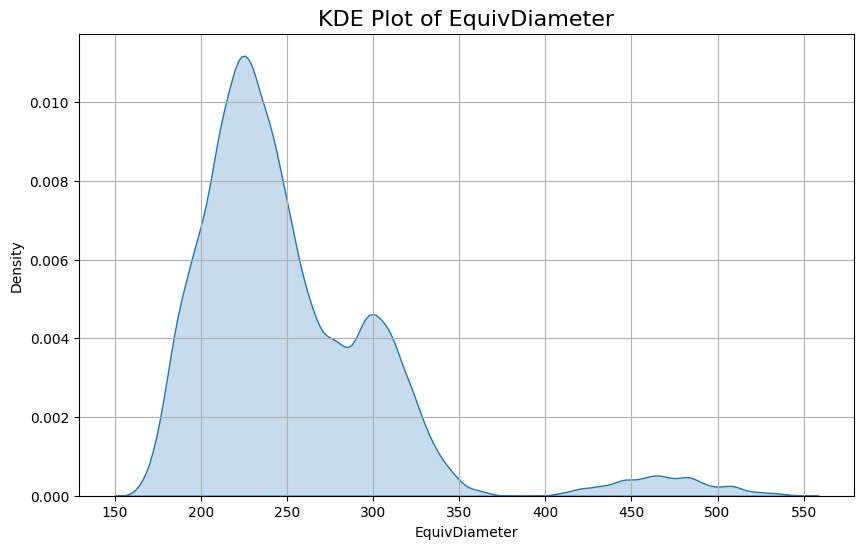

In [ ]:
# Plot Equiv Diameter exlcuding outleirs
plt.figure(figsize=(10, 6))
sns.kdeplot(df['EquivDiameter'], bw_adjust=0.5, fill=True)
plt.title('KDE Plot of EquivDiameter', fontsize=16)
plt.grid(True)
plt.show()


In [ ]:
# Clean of missing values
df_cleaned = df[df['Class'] != '?'].reset_index()
y = df_cleaned['Class']
X = df_cleaned.drop('Class', axis=1).replace('?', np.nan)

In [ ]:
# Encode categorical variables as numeric
label_encoder = LabelEncoder()
X['Colour'] = label_encoder.fit_transform(X['Colour'])

# Get mapping for future reference
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'black': 0, 'brown': 1, 'green': 2, 'white': 3, nan: 4}


In [ ]:
# Replace nans and store mapping
X['Colour'] = np.int16(X['Colour'].replace(4, np.nan))
mapping = {'black': 0, 'brown': 1, 'green': 2, 'white': 3}

/usr/local/lib/python3.10/dist-packages/pandas/core/series.py:953: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [ ]:
# Checking no nans
X['Colour'].value_counts()

,count
Colour,
1,6074
0,3538
2,2017
3,1917


In [ ]:
# Impute all with nearest neighbours
imputer = KNNImputer(n_neighbors=10)
X_imputed = pd.DataFrame(imputer.fit_transform(X),
                         columns=X.columns,
                         index=X.index)

X = X_imputed.copy()

In [ ]:
# Triple checking no nans
print(X['Colour'].isna().sum())

0


In [ ]:
y = df_cleaned['Class']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
mapping_y = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping_y)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


In [ ]:
# One hot encode colour
encoder = OneHotEncoder(sparse_output=False)
colour_encoded = pd.DataFrame(encoder.fit_transform(X_imputed[['Colour']]),
                              index=X_imputed.index)

# Rename columns according to mapping
colour_encoded.columns = [f"Colour_{key}" for key, value in sorted(mapping.items(), key=lambda item: item[1])]

In [ ]:
# Checking mapping correct
print(colour_encoded.head())

   Colour_black  Colour_brown  Colour_green  Colour_white
0           0.0           1.0           0.0           0.0
1           1.0           0.0           0.0           0.0
2           0.0           0.0           1.0           0.0
3           0.0           1.0           0.0           0.0
4           0.0           1.0           0.0           0.0


In [ ]:
# Create full df
X_encode = X.drop(['Colour'], axis=1)
X_encode = pd.concat([X_encode, colour_encoded], axis=1)

In [ ]:
# Checking X looks fine
X = X_encode.copy()
print(X.head())

   index      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  ConvexArea  Constantness  EquivDiameter    Extent  Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  ShapeFactor5  ShapeFactor6  Sort order  Colour_black  Colour_brown  Colour_green  Colour_white
0    0.0   84648.0   1132.054       439.915710       248.961941      1.767000      0.824453     86779.0           1.0     328.294351  0.767184  0.975443   0.830027     0.746266      0.005197      0.000994      0.556914      3.487008      0.984066     50.809833    0.134791           0.0           1.0           0.0           0.0
1    1.0   39704.0    736.873       271.659919       186.481404      1.456767      0.727175     40106.0           1.0     224.839282  0.757739  0.989977   0.918880     0.827650      0.006842      0.001980      0.685004      1.242335      0.997891    148.508874    0.898848           1.0           0.0           0.0           0.0
2    2.0   35

In [ ]:
# Ensuring everything is numeric
X = X.applymap(pd.to_numeric, errors='coerce')
print(X.dtypes)

<ipython-input-49-c9ea3e398981>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(pd.to_numeric, errors='coerce')


index              float64
Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
Constantness       float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
ShapeFactor5       float64
ShapeFactor6       float64
Sort order         float64
Colour_black       float64
Colour_brown       float64
Colour_green       float64
Colour_white       float64
dtype: object


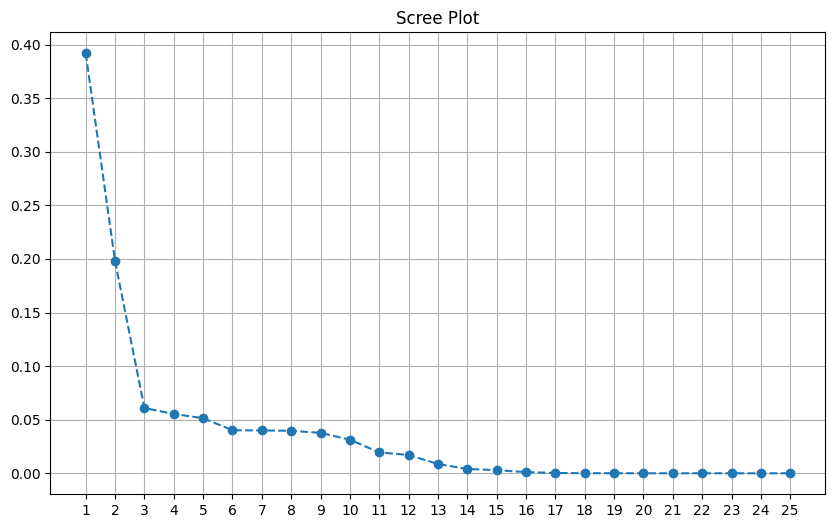

In [ ]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA on the standardized data
pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel = 'Principal Component'
plt.ylabel = 'Explained Variance Ratio'
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

In [ ]:
X_pca_3 = PCA(n_components=3).fit_transform(X_scaled)
X_pca_5 = PCA(n_components=5).fit_transform(X_scaled)

## Fitting Model

In [ ]:
def fit_knn_with_grid_search(X, y, cv=10):
    # Define pipeline with StandardScaler and KNN
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling features
        ('knn', KNeighborsClassifier())  # KNN model
    ])

    # Define grid params
    param_grid = {
        'knn__n_neighbors': [3, 5, 7, 9, 11, 13],
        'knn__weights': ['uniform', 'distance']
    }

    # Set up and fit GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X, y)

    # Print results
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

print("Best Params for Full X")
best_knn_model = fit_knn_with_grid_search(X_scaled, y)

print("\n Best Params for PCA 3 X")
best_knn_model = fit_knn_with_grid_search(X_pca_3, y)

print("\n Best Params for PCA 5 X")
best_knn_model = fit_knn_with_grid_search(X_pca_5, y)

Best Params for Full X
Best parameters: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Best cross-validation score: 0.9797

 Best Params for PCA 3 X
Best parameters: {'knn__n_neighbors': 13, 'knn__weights': 'uniform'}
Best cross-validation score: 0.9222

 Best Params for PCA 5 X
Best parameters: {'knn__n_neighbors': 13, 'knn__weights': 'uniform'}
Best cross-validation score: 0.9482


In [ ]:
def fit_decision_tree_with_grid_search(X, y, cv=10):
    # Initialize Tree
    decision_tree = DecisionTreeClassifier()

    # Define grid params
    param_grid = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_leaf': [1, 2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    # Set up and fit gridsearchCV
    grid_search = GridSearchCV(decision_tree, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X, y)

    # Output best params
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

best_decision_tree_model = fit_decision_tree_with_grid_search(X, y)

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5}
Best cross-validation score: 0.9807


In [ ]:
# Initialise optimal models
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
tree = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=5, random_state=42)

# Define scoring metrics
scorers = {
    'accuracy': 'accuracy',
    'f1_score': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, needs_proba=True)
}

# Perform cross-validation for KNN with timing
cv = KFold(n_splits=10, shuffle=True, random_state=42)
start_time = time.time()
knn_results = cross_validate(knn, X_scaled, y, cv=cv, scoring=scorers)
knn_time = time.time() - start_time

# Perform cross-validation for Decision Tree with timing
start_time = time.time()
tree_results = cross_validate(tree, X, y, cv=cv, scoring=scorers)
tree_time = time.time() - start_time

# Create summary table
results_table = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree'],
    'Mean Accuracy': [knn_results['test_accuracy'].mean(), tree_results['test_accuracy'].mean()],
    'Mean F1 Score': [knn_results['test_f1_score'].mean(), tree_results['test_f1_score'].mean()],
    'Mean Log Loss': [knn_results['test_log_loss'].mean(), tree_results['test_log_loss'].mean()],
    'Time (seconds)': [knn_time, tree_time]
})

results_table.reset_index(drop=True, inplace=True)
print(results_table)

           Model  Mean Accuracy  Mean F1 Score  Mean Log Loss  Time (seconds)
0            KNN       0.980142       0.975431       0.146640        2.038510
1  Decision Tree       0.978739       0.973538       0.424212        3.909337


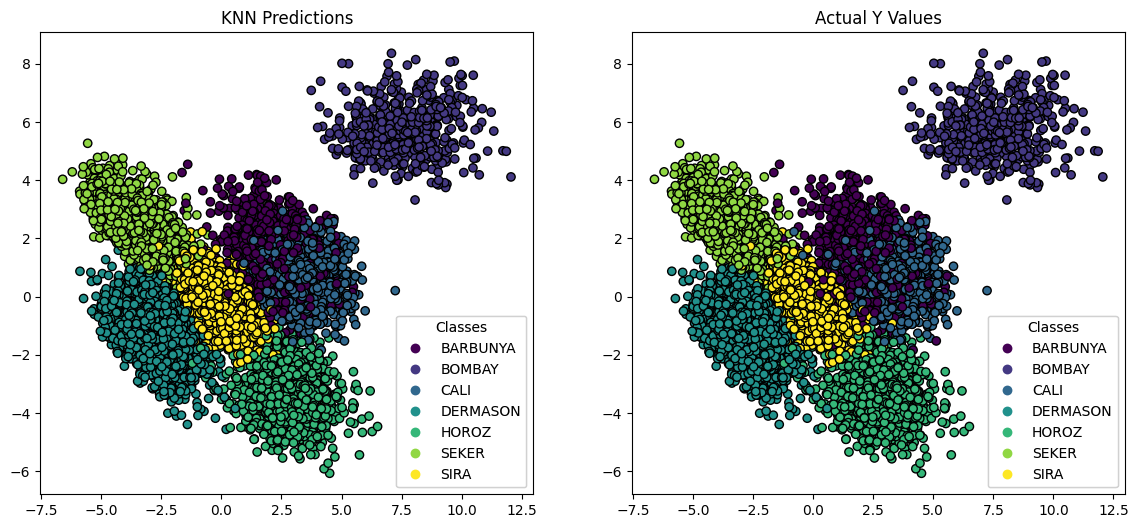

In [ ]:
# Fit KNN the optimal model
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

# Apply PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use y mapping for labels
mapping_y = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}

# Reverse dictionary to get back string names
reverse_mapping_y = {v: k for k, v in mapping_y.items()}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k')
axes[0].set_title('KNN Predictions')

# Adjust legend for string representation
handles, _ = scatter.legend_elements()
labels = [reverse_mapping_y[i] for i in range(len(mapping_y))]
legend1 = axes[0].legend(handles, labels, title="Classes")
axes[0].add_artist(legend1)

# Plot actual y values
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[1].set_title('Actual Y Values')

# Adjust legend fro string representation
handles, _ = scatter.legend_elements()
labels = [reverse_mapping_y[i] for i in range(len(mapping_y))]
legend2 = axes[1].legend(handles, labels, title="Classes")
axes[1].add_artist(legend2)

plt.show()